In [4]:
# Based on http://savvastjortjoglou.com/nba-shot-sharts.html

In [94]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Rectangle, Arc
import numpy as np
import pandas as pd

In [95]:
# Helper function from http://savvastjortjoglou.com/nba-shot-sharts.html
def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

In [96]:
# Load Data
all_shots = pd.read_csv('../shot_data/shots 2018-19.csv', index_col = 0)

In [102]:
"""List shot attempts in a game by team."""

game_id = 21800009 # NOR @ HOU 10/17/2018

def print_team_shot_attempts(game_id):
    """Print shot attempts in a game by team.
    
    Prints out the number of shot attempts by players from both teams.
    
    Format:
    Team 1 Team (# of total shots by Team 1)
     - Team 1 Player 1 # of shots by HP1
     - Team 1 Player 2 # of shots by HP2
     ...
    Team 2 Team (# of total shots by Team 2 Team)
     - Team 2 Player 1 # of shots by AP1
     - Team 2 Player 2 # of shots by AP2
     ...
    
    Arguments:
        game_id: An integer ID for the game.
    """
    
    game_shots = all_shots[all_shots.GAME_ID == game_id]
    teams_shots = [game_shots[game_shots.TEAM_ID == team_id] 
                  for team_id in set(game_shots.TEAM_ID)]
    for team_shots in teams_shots:
        print(f'{team_shots.iloc[0].TEAM_NAME} ({len(team_shots)})')
        team_players = list()
        for player_id in set(team_shots.PLAYER_ID):
            player_shots = team_shots[team_shots.PLAYER_ID == player_id]
            player_name = player_shots.iloc[0]['PLAYER_NAME']
            player_shots = len(player_shots)
            team_players.append((player_name, player_shots))

        team_players = sorted(team_players, 
            key = lambda player: player[1],
            reverse = True
        )

        for player, shot_count in team_players:
            print(f' - {player} {shot_count}')
            
print_team_shot_attempts(game_id)

Houston Rockets (92)
 - James Harden 15
 - Eric Gordon 14
 - Chris Paul 12
 - PJ Tucker 11
 - Carmelo Anthony 10
 - Michael Carter-Williams 10
 - Clint Capela 9
 - James Ennis III 7
 - Gerald Green 4
New Orleans Pelicans (98)
 - Anthony Davis 21
 - Nikola Mirotic 20
 - Julius Randle 15
 - Elfrid Payton 13
 - E'Twaun Moore 12
 - Jrue Holiday 12
 - Solomon Hill 3
 - Darius Miller 2


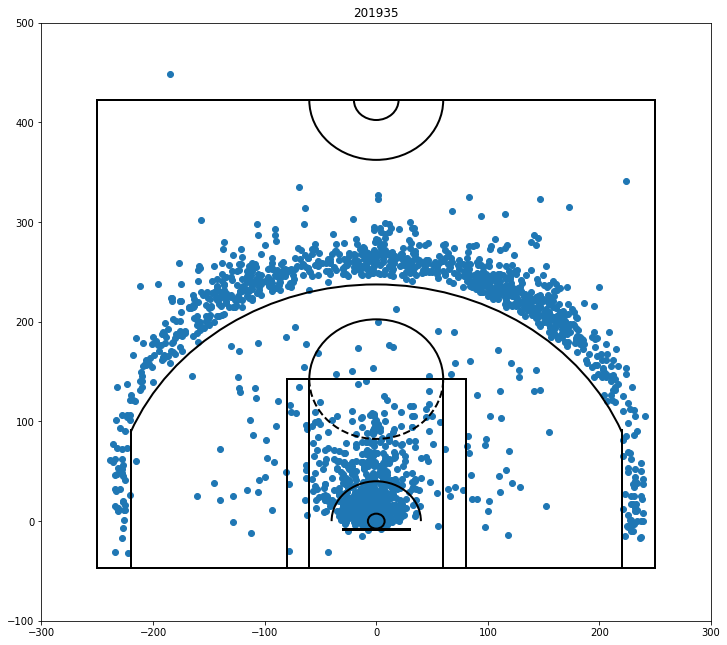

In [127]:
"""Plots shot attempts for a player."""
player_id = 201935 # James Harden
game_id = None # All games

def plot_shots(player_id, game_id):
    """Plots and displays shot positions based on the query.
    
    Arguments:
        player_id: (Optional) An integer ID for the player else None
            for everything.
        game_id: (Optional) An integer ID for the game else None for
            everything.
    """
    
    query = np.full(len(all_shots), True)
    if player_id is not None:
        query &= all_shots.PLAYER_ID == player_id
    if game_id is not None:
        query &= all_shots.GAME_ID == game_id
    
    player_shots = all_shots[query]

    # Plot data
    plt.figure(figsize = (12, 11))
    plt.title(f"{player_id if player_id is not None else ''} {game_id if game_id is not None else ''}".strip())
    plt.xlim(-300,300)
    plt.ylim(-100,500)
    draw_court(outer_lines = True)
    plt.scatter(player_shots.LOC_X, player_shots.LOC_Y)
    plt.show()
    
plot_shots(player_id, game_id)